# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [15]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [16]:
holding=Binance.get_inventory()

In [17]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4497.263381,1.0000,-131.886217,2312.32,2180.433783
OMUSDT,526.319895,2620.620688,0.5827,0.000000,2094.30,2094.300000
BTCUSDT,601.021649,869.681714,0.1934,3.537078,268.66,272.197078
SOLUSDT,281.200518,370.926097,0.0825,0.000000,89.73,89.730000
JASMYUSDT,387.458505,317.775681,0.0707,0.000000,-69.68,-69.680000
ETHUSDT,250.747339,186.362242,0.0414,0.000000,-64.39,-64.390000
TRXUSDT,76.868953,109.260917,0.0243,-10.723889,32.39,21.666111
BBUSDT,60.176053,21.629386,0.0048,-39.733101,-38.55,-78.283101
BNBUSDT,1.142121,1.006653,0.0002,-10.606040,-0.14,-10.746040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [18]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

430

In [19]:
data1=Binance.get_price(tickers,start_date)
data2=Binance.get_price(tickers,enddate)
data=data1.combine_first(data2)
data.index=pd.to_datetime(data.index)
#data=data.dropna(axis=1)
n=len(data.columns)
data=data.sort_index()

In [20]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [21]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [22]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [24]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [25]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [26]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [27]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
    
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [28]:
# pnl_history['Total']-pnl_history['Total'].shift(1)

In [29]:
# pnl_history['Total']


In [30]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [31]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [32]:
#realized_pnl_time=realized_pnl_time.resample("D").last().dropna().sort_index()

#pd.DataFrame(realized_pnl_time)

In [33]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [34]:
pnl_history['Total']

2024-09-23    -374.733177
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-29    1856.722021
2025-01-30    2444.042843
2025-01-31    2280.510081
2025-02-01    2121.973187
2025-02-02    1872.990523
Name: Total, Length: 133, dtype: float64

In [35]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-29    111.099918
2025-01-30    587.320822
2025-01-31   -163.532763
2025-02-01   -158.536893
2025-02-02   -248.982664
Name: Total, Length: 133, dtype: float64

In [36]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [37]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [38]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [39]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_154824\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [40]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [41]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [42]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

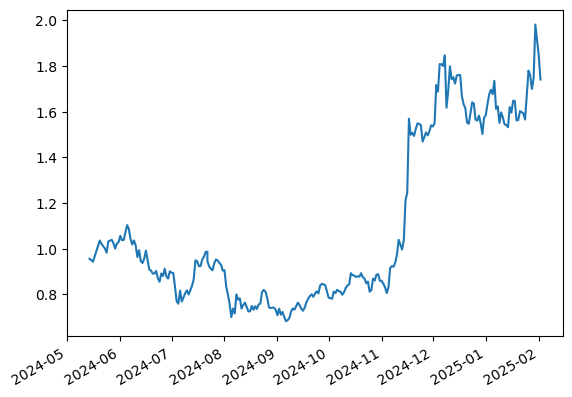

In [43]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [45]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [48]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [49]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [52]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4905
XRPUSDT,0.1675
BNBUSDT,0.1223
DEXEUSDT,0.0860
SUIUSDT,0.0611
PEPEUSDT,0.0402
RAYUSDT,0.0251
AAVEUSDT,0.0072
BONKUSDT,0.0000
WLDUSDT,0.0000


In [53]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.450780
BTCUSDT,0.300000
XRPUSDT,0.111577
DEXEUSDT,0.077063
SUIUSDT,0.043757
RAYUSDT,0.012578
PEPEUSDT,0.004244


### Current results

In [55]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [56]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.535376
BTCUSDT,0.374510
TRXUSDT,0.090114


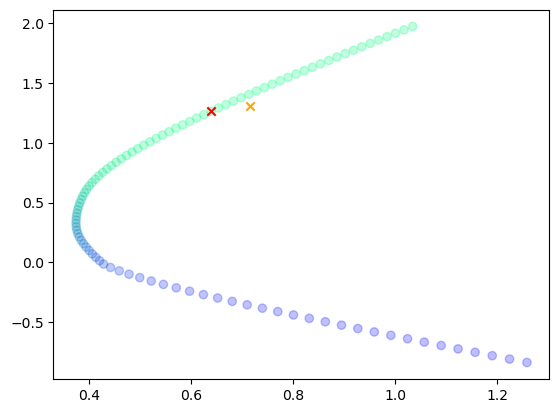

In [57]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [59]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2620.620688,0.582715,0.535376,0.047338
BTCUSDT,869.681714,0.193380,0.374510,-0.181130
SOLUSDT,370.926097,0.082478,0.000000,0.082478
JASMYUSDT,317.775681,0.070660,0.000000,0.070660
ETHUSDT,186.362242,0.041439,0.000000,0.041439
TRXUSDT,109.260917,0.024295,0.090114,-0.065819
BBUSDT,21.629386,0.004810,0.000000,0.004810
BNBUSDT,1.006654,0.000224,0.000000,0.000224
PEPEUSDT,0.000003,0.000000,0.000000,0.000000


In [60]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2620.620688,0.582715,0.450780,0.131935
BTCUSDT,869.681714,0.193380,0.300000,-0.106620
SOLUSDT,370.926097,0.082478,0.000000,0.082478
JASMYUSDT,317.775681,0.070660,0.000000,0.070660
ETHUSDT,186.362242,0.041439,0.000000,0.041439
TRXUSDT,109.260917,0.024295,0.000000,0.024295
BBUSDT,21.629386,0.004810,0.000000,0.004810
BNBUSDT,1.006654,0.000224,0.000000,0.000224
PEPEUSDT,0.000003,0.000000,0.004244,-0.004244
XRPUSDT,0.000000,0.000000,0.111577,-0.111577


# Risk Reward Analysis

In [62]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [63]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

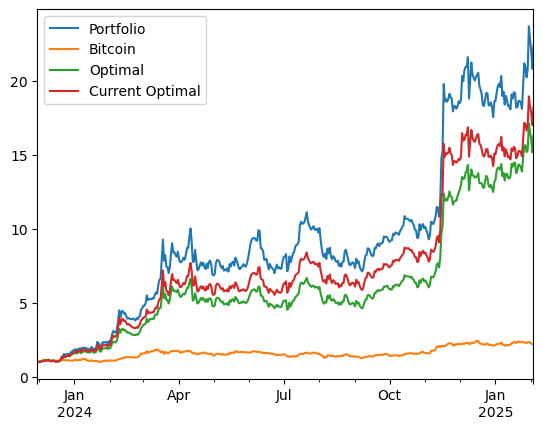

In [64]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [65]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

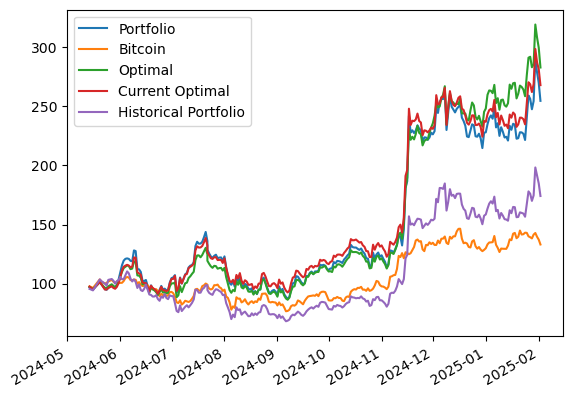

In [66]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [67]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-24,221.390712,143.102976,258.399184,234.633077,156.577799
2025-01-25,240.614061,142.934147,276.080059,252.724239,167.492235
2025-01-26,258.966825,140.002047,290.933937,270.182301,177.981837
2025-01-27,256.178453,139.267274,291.720537,268.496959,175.966487
2025-01-28,247.366792,138.244001,282.868986,261.907916,169.963707
2025-01-29,254.256201,141.476921,285.307450,268.623499,174.562610
2025-01-30,289.554330,142.820328,318.962573,298.297321,198.187203
2025-01-31,278.651051,139.657879,308.057305,287.163212,191.324410
2025-02-01,269.591359,137.190295,299.396088,281.146936,184.686080
2025-02-02,254.474336,133.129604,282.664948,267.756757,174.094032


## Volatilities

In [69]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.684895
 dtype: float64,
 0.6856678256558275)

In [70]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.715796
 dtype: float64,
 0.7157964462415465)

In [71]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.824497
Bitcoin            0.426446
Optimal            0.685668
Current Optimal    0.741858
dtype: float64

In [72]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4625248535368612

In [73]:
days=120
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.6040560179633045

In [74]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.8202887812815736

## Risk Contribution

In [76]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BTCUSDT,0.369530,0.300000,0.020225,0.106624,0.034813,0.071811
DEXEUSDT,0.181795,0.077063,0.007819,0.044367,0.010779,0.033588
OMUSDT,31.199298,0.450780,0.956065,0.763860,0.663143,0.100717
PEPEUSDT,0.007029,0.004244,0.000341,0.002882,0.000060,0.002823
RAYUSDT,0.049274,0.012578,0.001868,0.010348,0.000457,0.009891
SUIUSDT,0.077433,0.043757,0.003661,0.023230,0.003699,0.019531
XRPUSDT,0.220155,0.111577,0.010021,0.048689,0.012086,0.036603


In [77]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.014268,0.535376,0.795131,0.835451,0.749022,0.086429
BTCUSDT,0.163067,0.374510,0.167649,0.125145,0.055466,0.069679
TRXUSDT,0.029234,0.090114,0.037220,0.039403,0.013573,0.025830


In [78]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.226693,0.591837,0.854532,0.824146,0.731089,0.093057
BTCUSDT,0.084417,0.193878,0.084374,0.057537,0.011873,0.045664
SOLUSDT,0.009419,0.081633,0.027606,0.043425,0.005766,0.037659
JASMYUSDT,-0.019782,0.071429,0.015658,0.054272,0.012339,0.041933
ETHUSDT,-0.009038,0.040816,0.009635,0.013990,0.000983,0.013006
TRXUSDT,0.006621,0.020408,0.008195,0.006630,0.000556,0.006074


# Value At Risk

## Historical

### Optimal Weights

In [82]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.05222869026454632, -0.07843698952633553)

### Current Weights

In [84]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.05153621881767842, -0.07583220179662171)

In [85]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [86]:
var=historical_var.iloc[row]
var

OMUSDT      -0.031950
BTCUSDT     -0.004312
SOLUSDT     -0.005868
JASMYUSDT   -0.007885
ETHUSDT     -0.001562
TRXUSDT     -0.000249
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.051826
Name: 2024-10-25 00:00:00, dtype: float64

In [87]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.057977
BTCUSDT     -0.005122
SOLUSDT     -0.004388
JASMYUSDT   -0.005935
ETHUSDT     -0.001753
TRXUSDT     -0.000658
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.075832
dtype: float64

## Parametric

### Optimal Weights

In [90]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.07104618419711482, -0.09106156495867425)

### Current Weights

In [92]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.0741679925241872, -0.09506286010178167)

## Multivariate

### Optimal Weights

In [95]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.0641562523555843, -0.08245646436451182)

### Current Weights

In [97]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06887041031068952, -0.08747280426659171)

In [98]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.055250
BTCUSDT     -0.004866
SOLUSDT     -0.003690
JASMYUSDT   -0.003500
ETHUSDT     -0.001245
TRXUSDT     -0.000214
Portfolio   -0.068764
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [102]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06230096467683273, -0.08109332929846158)

### Current Weights

In [104]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07003581066238683, -0.08896122894520804)

In [105]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.056404
BTCUSDT     -0.004001
SOLUSDT     -0.003047
JASMYUSDT   -0.004016
ETHUSDT     -0.001203
TRXUSDT     -0.000403
Portfolio   -0.069075
dtype: float64

## Student Copula

### Optimal Weights

In [108]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06304278389626523, -0.0807174868406197)

### Current Weights

In [110]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07165489401192872, -0.09112115259416839)

In [111]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.057947
BTCUSDT     -0.004061
SOLUSDT     -0.002945
JASMYUSDT   -0.003811
ETHUSDT     -0.001006
TRXUSDT     -0.000554
Portfolio   -0.070323
dtype: float64

## Gumbel Copula

### Optimal Weights

In [114]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.12408798545849488, -0.17384636636728137)

### Current Weights

In [116]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.13610976572353387, -0.1969544741191865)

In [117]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.136976
BTCUSDT     -0.000227
SOLUSDT     -0.000537
JASMYUSDT   -0.000653
ETHUSDT      0.000157
TRXUSDT      0.000223
Portfolio   -0.138012
dtype: float64

## Monte Carlo

### Optimal

In [120]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [121]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07321075174268213, -0.09202910553033665)

### Current Weights

In [123]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0773188680600336, -0.09718344974235033)

In [124]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.061023
BTCUSDT     -0.004699
SOLUSDT     -0.003464
JASMYUSDT   -0.004753
ETHUSDT     -0.001185
TRXUSDT     -0.000600
Portfolio   -0.075725
dtype: float64

## VaR Violation

In [126]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.060249,-0.107681,-0.093063,-0.021394
2024-01-15,-0.060249,-0.107680,-0.090928,0.015160
2024-01-16,-0.060249,-0.107700,-0.090014,0.050650
2024-01-17,-0.060249,-0.109589,-0.091868,-0.030938
2024-01-18,-0.060249,-0.112045,-0.095675,-0.039062
...,...,...,...,...
2025-01-30,-0.054995,-0.084246,-0.073463,0.117961
2025-01-31,-0.054995,-0.086248,-0.080729,-0.034190
2025-02-01,-0.054995,-0.085818,-0.079448,-0.028116
2025-02-02,-0.056976,-0.089556,-0.086970,-0.055883


In [127]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.040644,-0.083850,-0.079000,-0.015749
2024-05-29,-0.040644,-0.081589,-0.077131,-0.007484
2024-05-30,-0.040644,-0.071308,-0.073242,0.029498
2024-05-31,-0.040644,-0.074192,-0.071122,0.044317
2024-06-01,-0.040644,-0.079288,-0.073007,0.060138
...,...,...,...,...
2025-01-30,-0.048388,-0.116995,-0.103408,0.138829
2025-01-31,-0.048845,-0.120087,-0.104753,-0.037655
2025-02-01,-0.048845,-0.123111,-0.114199,-0.032513
2025-02-02,-0.055317,-0.129308,-0.123246,-0.056074


<Axes: >

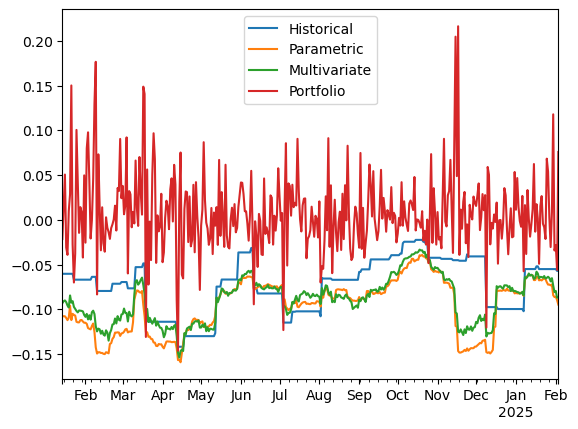

In [128]:
var_data.plot()

<Axes: >

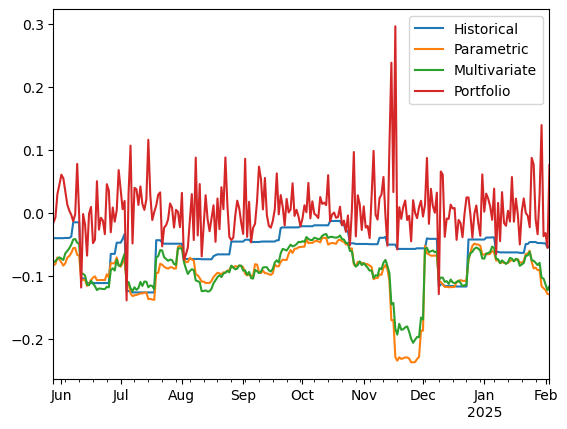

In [129]:
current_var_data.plot()

In [130]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.02584,0.010336,0.010336
Kupiec Stat,5.73365,18.720966,18.720966
P-value,0.016643,0.000015,0.000015


In [131]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.059524,0.015873,0.011905
Kupiec Stat,0.454743,8.326085,10.96941
P-value,0.500091,0.003908,0.000926


# Principal Component Analysis

## Historical PCA

In [134]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.78223952, 0.06878377, 0.05842542, 0.05012201, 0.04042928])

In [135]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016178
ADAUSDT     0.016154
ALGOUSDT    0.018551
APTUSDT     0.016767
ARBUSDT     0.017976
              ...   
WBTCUSDT    0.009194
WLDUSDT     0.022733
XLMUSDT     0.013342
XRPUSDT     0.011491
XTZUSDT     0.016660
Name: PC1, Length: 61, dtype: float64

<Axes: >

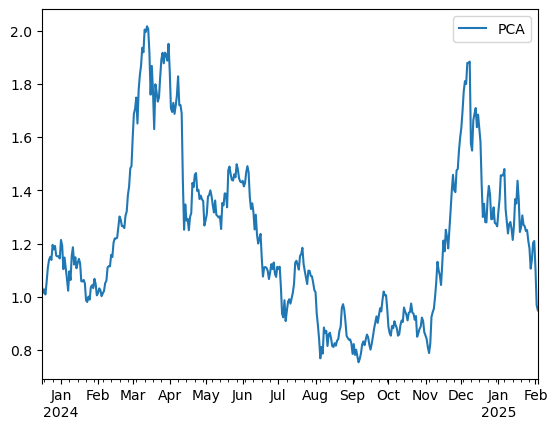

In [136]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

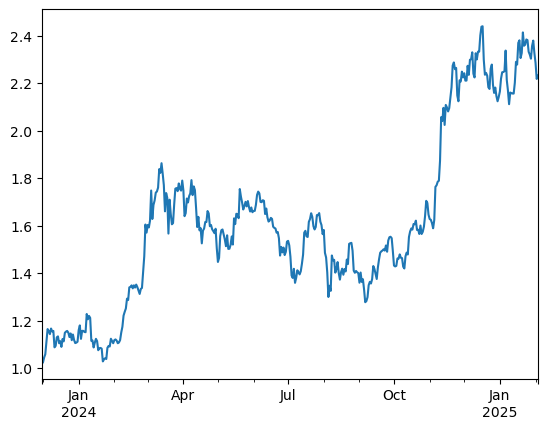

In [137]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [138]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.427083
WBETHUSDT    0.440866
ETHUSDT      0.441144
ATOMUSDT     0.462666
DOTUSDT      0.463877
ETCUSDT      0.471036
NEXOUSDT     0.477367
ADAUSDT      0.506689
WBTCUSDT     0.523438
BTCUSDT      0.524033
EOSUSDT      0.529157
AVAXUSDT     0.529301
IOTAUSDT     0.557356
FILUSDT      0.560222
ARBUSDT      0.570510
GRTUSDT      0.579744
XTZUSDT      0.586838
LINKUSDT     0.597512
SOLUSDT      0.604055
dtype: float64

<Axes: >

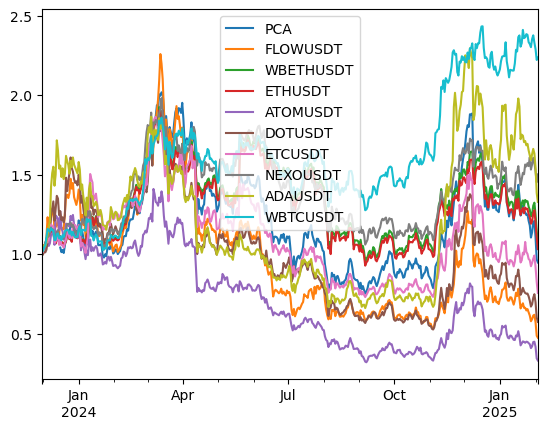

In [139]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

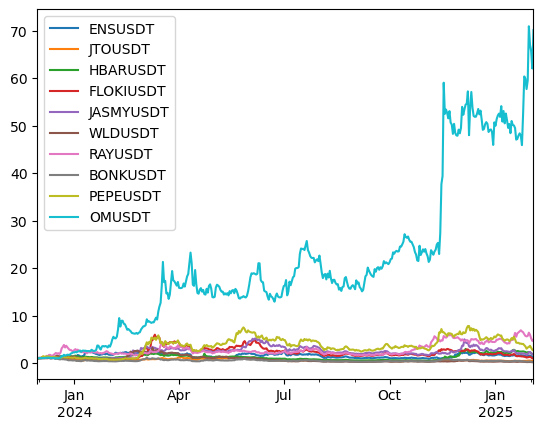

In [140]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [142]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.5664796 , 0.14730851, 0.11931318, 0.09584059, 0.07105812])

In [143]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.092959
BTCUSDT      0.059045
SOLUSDT      0.097295
JASMYUSDT    0.176065
ETHUSDT      0.085030
TRXUSDT      0.056277
BBUSDT       0.207721
BNBUSDT      0.065298
PEPEUSDT     0.160310
Name: PC1, dtype: float64

<Axes: >

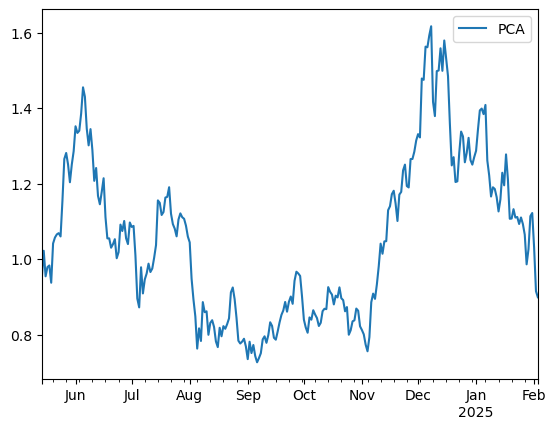

In [144]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

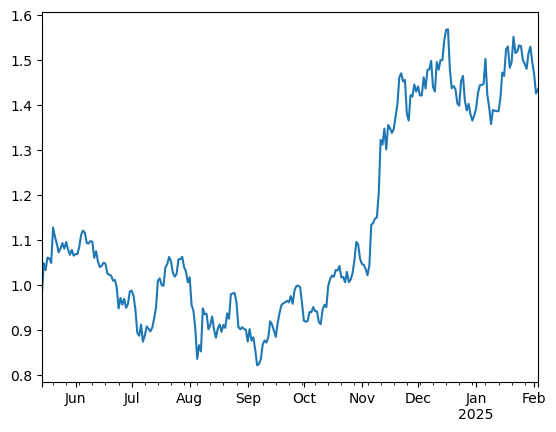

In [145]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [146]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.433903
BNBUSDT      0.465641
BTCUSDT      0.489348
SOLUSDT      0.492368
JASMYUSDT    0.689962
PEPEUSDT     0.743036
BBUSDT       0.773574
TRXUSDT      0.900081
OMUSDT       0.973559
dtype: float64

<Axes: >

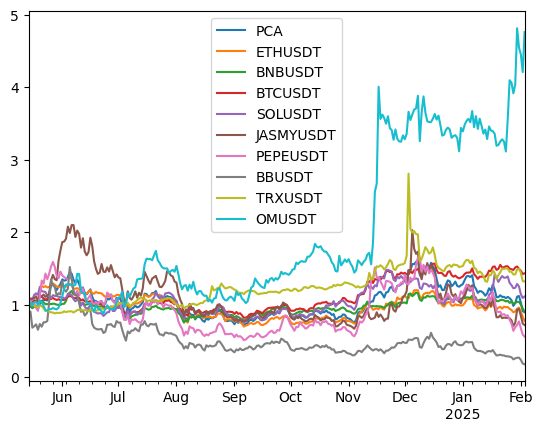

In [147]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [149]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.911102
BBUSDT       1.578709
JASMYUSDT    1.334331
SOLUSDT      1.162167
BTCUSDT      1.000000
ETHUSDT      0.973480
OMUSDT       0.875362
BNBUSDT      0.663600
TRXUSDT      0.326848
Name: BTCUSDT, dtype: float64

In [150]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.296234
PEPEUSDT     2.059595
BBUSDT       2.018210
SOLUSDT      1.351280
ETHUSDT      1.174569
TRXUSDT      1.086705
BTCUSDT      1.000000
OMUSDT       0.816062
BNBUSDT      0.678780
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [152]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [153]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.312959
BBUSDT,0.260667
TRXUSDT,0.197246
PEPEUSDT,0.155929
ETHUSDT,0.073530
SOLUSDT,0.068898
JASMYUSDT,0.059340
BNBUSDT,0.032970
OMUSDT,0.025126


### Regression to PCA

In [155]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.8045263029136162

In [156]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.305311
BNBUSDT      1.186071
ETHUSDT      1.020112
PCA          1.000000
SOLUSDT      0.756267
JASMYUSDT    0.437048
PEPEUSDT     0.417431
BBUSDT       0.383833
TRXUSDT      0.254796
OMUSDT       0.239013
dtype: float64

In [157]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      1.909704
BTCUSDT      1.733066
TRXUSDT      1.169087
ETHUSDT      1.161695
PCA          1.000000
BBUSDT       0.702642
PEPEUSDT     0.656787
JASMYUSDT    0.527418
SOLUSDT      0.472971
OMUSDT       0.294669
dtype: float64

### Correlation Matrix

<Axes: >

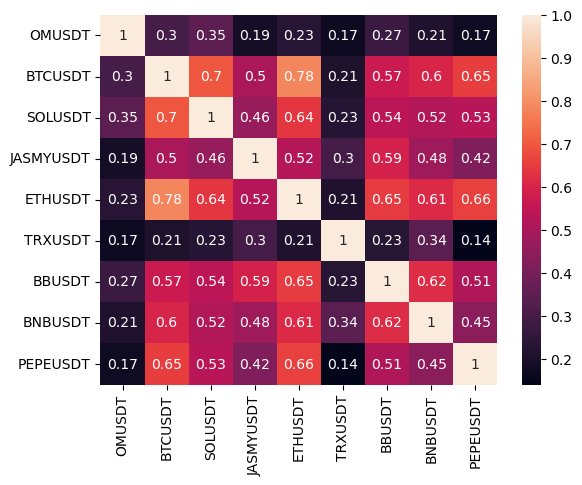

In [159]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

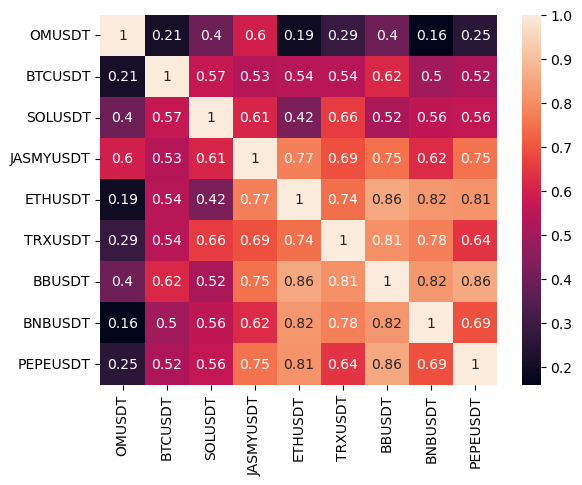

In [160]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [162]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [163]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-28,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.952499,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-07-28,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.687550,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.094736,0.0
2024-08-27,0.990055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009945,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-09-26,0.117914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-10-26,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698574,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-11-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.13488,0.200094,0.0
2024-12-25,0.873315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2025-01-24,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.482283,0.0
2025-02-03,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0


In [164]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
JTOUSDT     0.000000
LINKUSDT    0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
Name: 2025-02-03 00:00:00, dtype: float64